In [ ]:
# Importando as bib necessárias
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Importando os dados
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2021-04-12 17:21:11--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2021-04-12 17:21:11 (50.2 MB/s) - ‘moore.csv’ saved [2302/2302]



In [ ]:
# Analisando os dados
!head moore.csv

1971,2300
1972,3500
1973,2500
1973,2500
1974,4100
1974,4500
1974,8000
1975,3510
1976,5000
1976,8500


In [ ]:
# Carregando os dados e salvando em data
data = pd.read_csv('moore.csv', header=None).values
X = data[:,0].reshape(-1,1) # Tornando os dados em 2D de tamanho N x D, neste caso D=1 e N = 162
y = data[:,1]

In [ ]:
X_mean = np.mean(X)
X = X - X_mean # Os dados vao de 1970 a 2020 (números grandes e longe do zero), assim, é feito esse pré processamento
# Nao normalizamos para nao perder a informaçao dos dados

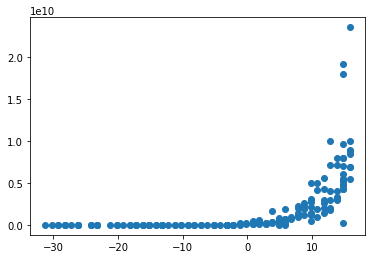

In [ ]:
plt.scatter(X,y)

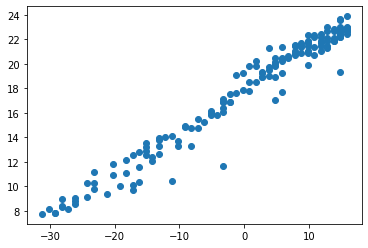

In [ ]:
# Por ser um modelo exponencial, para usar REGLIN temos que tomar o log de y
y = np.log(y)
plt.scatter(X,y)

In [ ]:
# Declarando o modelos e suas camadas
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(1), # D = 1
  tf.keras.layers.Dense(1)  # Problemas de regressao (sem funcao de ativaçao)
])
# Ajustando o modelo para o aprendizado(treino)
model.compile(optimizer = tf.keras.optimizers.SGD(0.001, 0.9), loss = 'mse')

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 533.0433
Epoch 2/200
6/6 [==============================] - 0s 4ms/step - loss: 499.8310
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 775.7547
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 286.9487
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 211.8914
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 150.6823
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 105.4145
Epoch 8/200
6/6 [==============================] - 0s 3ms/step - loss: 68.9592
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 44.0161
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 34.1360
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 22.0448
Epoch 12/200
6/6 [==============================] - 0s 3ms/step - loss: 19.2373
Epoch 13/200
6/6 [========================

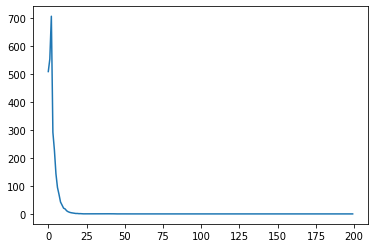

In [ ]:
# Programando nossa taxa de aprendizado (teoria do gradiente descendente!!)
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  else:
    return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

# Treinando o modelo
r = model.fit(X, y, epochs = 200, callbacks=[scheduler])

# Plotando o erro
plt.plot(r.history['loss'])

In [ ]:
# Obtendo os coeficientes angulares (wT) e lineares dos dados (b)
print(model.layers)
print(model.layers[0].get_weights()) # a = 0.34021783 | b = 17.78569

[array([[0.34572467]], dtype=float32), array([17.772259], dtype=float32)]


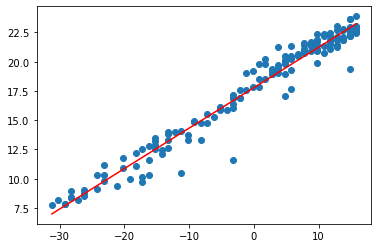

In [ ]:
a = model.layers[0].get_weights()[0][0,0]
b = model.layers[0].get_weights()[1][0]
y_hat = X*a + b
plt.scatter(X,y)
plt.plot(X,y_hat, 'r')

## Fazendo previsoes

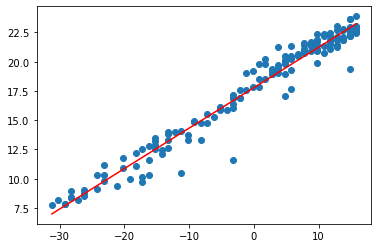

In [ ]:
# Comumente é utilizado .predict assim como no scikit learn
Y_hat = model.predict(X).flatten()
plt.scatter(X, y)
plt.plot(X, Y_hat, 'r')

In [ ]:
# Obtendo os pesos (agora de uma forma mais manual) e o bias 
w, b = model.layers[0].get_weights()

# Voltando ao estado original (antes fizemos a mudança)
X = X.reshape(-1,1)

# Calculando o valor de Y_hat
Y_hat2 = (X.dot(w) + b).flatten() # (N x 1)·(1 x 1) + (1) --> (N x 1)

# Para pontos flutuantes nao use ==
np.allclose(Y_hat, Y_hat2)

True

## Salvando o modelo